In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Leyendo los datos

Para leer un archivo de excel (.xls) puedes utilizar la librería `pandas`, aquí puedes encontrar la documentación para hacer esto:  
[Leer excel con pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [2]:
df = pd.read_excel("./IMM_2020.xls", 
                   sheet_name="IMM_2020", # Queremos una pestaña específica
                   header=0,              # Qué fila usar como los headers del DataFrame (0 index)
                   )

df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


## 1.1 Leyendo el diccionario de datos
Esto nos brindará una mejor comprensión de los nombres de las columnas.

In [3]:
dicc = pd.read_excel("./IMM_2020.xls", 
                   sheet_name="Diccionario", # Queremos una pestaña específica
                   header=2,              # Qué fila usar como los headers del DataFrame (0 index)
                   )

dicc.head(-1)

,Variable,Descripción
0,CVE_ENT,Clave de entidad federativa
1,NOM_ENT,Nombre de entidad federativa
2,CVE_MUN,Clave del municipio
3,NOM_MUN,Nombre del municipio
4,POB_TOT,Población total
5,ANALF,Porcentaje de población analfabeta de 15 años ...
6,SBASC,Porcentaje de población de 15 años o más sin e...
7,OVSDE,Porcentaje de ocupantes en viviendas particula...
8,OVSEE,Porcentaje de ocupantes en viviendas particula...
9,OVSAE,Porcentaje de ocupantes en viviendas particula...


## 2. Explorando los datos

### 2.1 Tipo de los datos, espacio utilizado y valores faltantes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB


De aquí podemo extraer la siguiente información:
- Hay un total de 2,469 registros
- No existen valores faltantes
- La mayoría de los datos son numéricos
- Los datos ocupan poco espacio (328 KB)

### 2.2 Estadísticas básicas

In [5]:
df.describe().applymap('{:,.3f}'.format) # Para que no muestre tantos decimales

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,"2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000","2,469.000"
mean,19.215,"19,324.165","51,038.487",10.164,45.853,3.160,1.501,6.118,7.987,26.566,69.900,82.144,53.956,0.845
std,7.367,"7,382.892","146,990.726",7.634,13.982,5.289,2.769,9.246,8.974,10.587,35.268,11.830,3.905,0.061
min,1.000,"1,001.000",81.000,0.353,5.535,0.000,0.000,0.000,0.000,3.950,0.000,28.453,21.407,0.335
25%,14.000,"14,079.000","4,489.000",4.428,35.738,0.652,0.366,0.878,1.655,18.725,40.130,74.616,51.844,0.812
50%,20.000,"20,226.000","13,552.000",8.203,46.339,1.428,0.828,2.452,4.714,25.000,100.000,84.643,54.424,0.852
75%,24.000,"24,027.000","35,284.000",13.787,55.856,3.343,1.678,7.286,11.030,32.821,100.000,91.620,56.696,0.888
max,32.000,"32,058.000","1,922,523.000",53.071,88.328,64.450,53.065,81.788,68.150,69.564,100.000,100.000,62.397,0.977


Obsevando las estadísticas rápidamente, podriamos decir qué:  
- En promedio, existe un 10% de población analfabeta de 15 años o más.  
- Hay municipios donde existe un 53% de la población con analfabetismo.
- La media del porcentaje de población de 15 años o más sin educación básica es de un 45%.
- El promedio de porcentaje de población que vive en hacinamiento es del 26%.
- Hay un 70% de población que vive en localidades menores a 5,000 habitantes.

In [6]:
df.describe(include=object)

,NOM_ENT,NOM_MUN,GM_2020
count,2469,2469,2469
unique,32,2328,5
top,Oaxaca,Benito Juárez,Muy bajo
freq,570,7,655


In [7]:
df[df["GM_2020"] == "Muy bajo"]["GM_2020"]

0       Muy bajo
1       Muy bajo
2       Muy bajo
3       Muy bajo
4       Muy bajo
          ...   
2458    Muy bajo
2462    Muy bajo
2465    Muy bajo
2466    Muy bajo
2467    Muy bajo
Name: GM_2020, Length: 655, dtype: object

# c.
Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png

Primero agrupamos por Estado y por nivel de marginación

In [8]:
df_agrupado = df.groupby(["NOM_ENT", "GM_2020"])["CVE_ENT"].count().reset_index()
df_agrupado = df_agrupado.rename(columns={"CVE_ENT":"Conteo", "NOM_ENT": "Estado", "GM_2020":"Nivel_marginacion"})

In [9]:
df_agrupado.head()

,Estado,Nivel_marginacion,Conteo
0,Aguascalientes,Muy bajo,11
1,Baja California,Medio,1
2,Baja California,Muy bajo,5
3,Baja California Sur,Muy bajo,5
4,Campeche,Alto,2


In [10]:
df_agrupado[df_agrupado["Estado"] == "Baja California"]

,Estado,Nivel_marginacion,Conteo
1,Baja California,Medio,1
2,Baja California,Muy bajo,5


Alhunas operaciones para extraer las labels de los Estado y de los niveles, reseteamos el indice para tener un DataFrame con un formato más comun

In [11]:
estados = df_agrupado["Estado"].unique()
nivel_marg = df_agrupado["Nivel_marginacion"].unique()

In [12]:
# Reindexar el DataFrame agrupado para asegurarse de que todos los grupos tengan un valor asignado
df_agrupado = (df_agrupado.set_index(['Estado', 'Nivel_marginacion'])
               .reindex(pd.MultiIndex.from_product([estados, nivel_marg], names=['Estado', 'Nivel_marginacion']))
               .reset_index())
df_agrupado['Conteo'] = df_agrupado['Conteo'].fillna(0)  # Rellenar los valores faltantes con 0

In [13]:
df_agrupado.head()

,Estado,Nivel_marginacion,Conteo
0,Aguascalientes,Muy bajo,11.0
1,Aguascalientes,Medio,0.0
2,Aguascalientes,Alto,0.0
3,Aguascalientes,Bajo,0.0
4,Aguascalientes,Muy alto,0.0


Contamos el número de municipios por Estado, esto para obtener el porcentaje de cada nivel

In [14]:
num_municipios = df.groupby(["NOM_ENT"]).count()["CVE_ENT"].values
num_municipios

array([ 11,   6,   5,  12, 124,  67,  16,  38,  10,  39,  46,  81,  84,
       125, 113,  36, 125,  20,  51, 570, 217,  18,  11,  58,  18,  72,
        17,  43,  60, 212, 106,  58], dtype=int64)

Obtenemos el porcentaje y lo ponemos en una nueva columna

In [15]:
df_agrupado2 = df_agrupado.copy()
df_agrupado2["Porcentaje munic"] = df_agrupado2["Conteo"] / np.repeat(num_municipios,5)

In [16]:
df_agrupado2.head()

,Estado,Nivel_marginacion,Conteo,Porcentaje munic
0,Aguascalientes,Muy bajo,11.0,1.0
1,Aguascalientes,Medio,0.0,0.0
2,Aguascalientes,Alto,0.0,0.0
3,Aguascalientes,Bajo,0.0,0.0
4,Aguascalientes,Muy alto,0.0,0.0


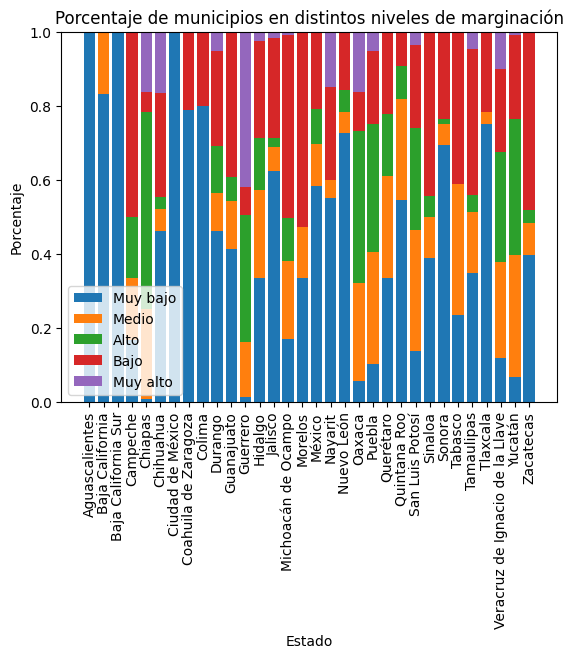

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df_agrupado2[["Estado", "Nivel_marginacion", "Porcentaje munic"]]

# Obtener las categorías y los nombres de las variables
categorias = df2['Estado'].unique()
variables = df2['Nivel_marginacion'].unique()

# Crear el gráfico de barras apiladas con el máximo de 1
fig, ax = plt.subplots()

# Configurar la posición de las barras
posicion = range(len(categorias))

# Dibujar las barras apiladas
bottom = [0] * len(categorias)
for variable in variables:
    sub_df2 = df2[df2['Nivel_marginacion'] == variable]
    porcentajes = sub_df2['Porcentaje munic'].tolist()
    ax.bar(posicion, porcentajes, bottom=bottom, label=variable)
    bottom = [i + j for i, j in zip(bottom, porcentajes)]

# Configuración del gráfico
ax.set_xticks(posicion)
ax.set_xticklabels(categorias, rotation=90)
ax.set_xlabel('Estado')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de municipios en distintos niveles de marginación')
ax.legend()
plt.savefig("porcentaje_municipios_nivel_marginacion.png")
# Mostrar el gráfico
plt.show()


# d.

También agrupamos por nombre del Estado y nivel de marginación pero ahora tomamos la población por con ese nivel.

In [18]:
df_agrupado_d = df.groupby(["NOM_ENT", "GM_2020"])["POB_TOT"].sum().reset_index()
df_agrupado_d = df_agrupado_d.rename(columns={"POB_TOT":"Poblacion", 
                                            "NOM_ENT": "Estado", 
                                            "GM_2020":"Nivel_marginacion"})
df_agrupado_d.head()

,Estado,Nivel_marginacion,Poblacion
0,Aguascalientes,Muy bajo,1425607
1,Baja California,Medio,117568
2,Baja California,Muy bajo,3651452
3,Baja California Sur,Muy bajo,798447
4,Campeche,Alto,78627


In [19]:
estados = df_agrupado_d["Estado"].unique()
nivel_marg = df_agrupado_d["Nivel_marginacion"].unique()
# Reindexar el DataFrame agrupado para asegurarse de que todos los grupos tengan un valor asignado
df_agrupado_d = (df_agrupado_d.set_index(['Estado', 'Nivel_marginacion'])
               .reindex(pd.MultiIndex.from_product([estados, nivel_marg], names=['Estado', 'Nivel_marginacion']))
               .reset_index())
df_agrupado_d['Poblacion'] = df_agrupado_d['Poblacion'].fillna(0)  # Rellenar los valores faltantes con 0

In [20]:
df_agrupado_d.head()

,Estado,Nivel_marginacion,Poblacion
0,Aguascalientes,Muy bajo,1425607.0
1,Aguascalientes,Medio,0.0
2,Aguascalientes,Alto,0.0
3,Aguascalientes,Bajo,0.0
4,Aguascalientes,Muy alto,0.0


Contamos la población total por estado

In [21]:
pob_municipios = df.groupby(["NOM_ENT"]).sum()["POB_TOT"].values
print(pob_municipios)

[ 1425607  3769020   798447   928363  5543828  3741869  9209944  3146771
   731391  1832650  6166934  3540685  3082841  8348151  4748846  1971520
 16992418  1235456  5784442  4132148  6583278  2368467  1857985  2822255
  3026943  2944840  2402598  3527735  1342977  8062579  2320898  1622138]


In [22]:
df_agrupado_d2 = df_agrupado_d.copy()
# Repetimos 5 veces (niveles de marginacion) para que los arreglos tengan la misma dimensión
df_agrupado_d2["Porcentaje pob"] = df_agrupado_d2["Poblacion"] / np.repeat(pob_municipios,5)

In [23]:
df_agrupado_d2.head()

,Estado,Nivel_marginacion,Poblacion,Porcentaje pob
0,Aguascalientes,Muy bajo,1425607.0,1.0
1,Aguascalientes,Medio,0.0,0.0
2,Aguascalientes,Alto,0.0,0.0
3,Aguascalientes,Bajo,0.0,0.0
4,Aguascalientes,Muy alto,0.0,0.0


In [24]:
df_agrupado_d2.tail()

,Estado,Nivel_marginacion,Poblacion,Porcentaje pob
155,Zacatecas,Muy bajo,1165956.0,0.718777
156,Zacatecas,Medio,102284.0,0.063055
157,Zacatecas,Alto,6974.0,0.004299
158,Zacatecas,Bajo,346924.0,0.213868
159,Zacatecas,Muy alto,0.0,0.000000


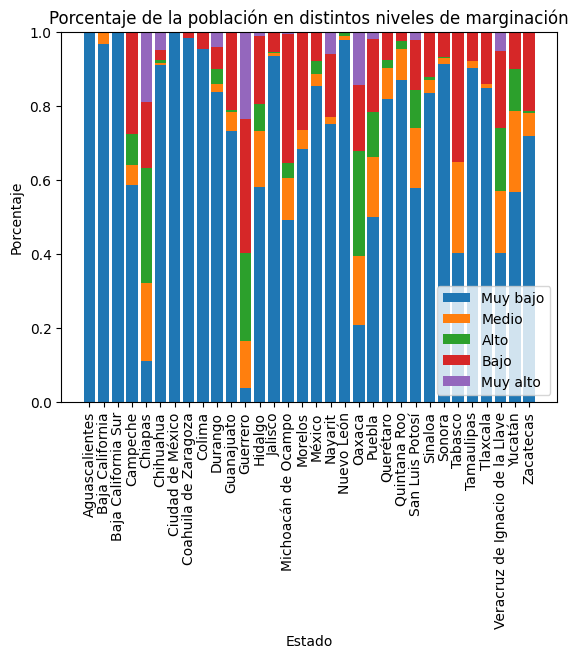

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df_agrupado_d2[["Estado", "Nivel_marginacion", "Porcentaje pob"]]

# Obtener las categorías y los nombres de las variables
categorias = df2['Estado'].unique()
variables = df2['Nivel_marginacion'].unique()

# Crear el gráfico de barras apiladas con el máximo de 1
fig, ax = plt.subplots()

# Configurar la posición de las barras
posicion = range(len(categorias))

# Dibujar las barras apiladas
bottom = [0] * len(categorias)
for variable in variables:
    sub_df2 = df2[df2['Nivel_marginacion'] == variable]
    porcentajes = sub_df2['Porcentaje pob'].tolist()
    ax.bar(posicion, porcentajes, bottom=bottom, label=variable)
    bottom = [i + j for i, j in zip(bottom, porcentajes)]

# Configuración del gráfico
ax.set_xticks(posicion)
ax.set_xticklabels(categorias, rotation=90)
ax.set_xlabel('Estado')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de la población en distintos niveles de marginación')
ax.legend()
plt.savefig("porcentaje_pob_nivel_marginacion.jpg")

# Mostrar el gráfico
plt.show()


Si hay algunas diferencias, hay municipios como Sinaloa que tiene mucha población con nivel bajo de marginación, sin embargo tiene muchos municipios con niveles superiores de marginación. Lo que quiere decir que podría haber municipios del estado donde se concentra mucha población con bajo nivel de marginación, pero podría haber municipios con la mayoria de la población en niveles de marginación más altos.

# f

<Axes: xlabel='PL.5000', ylabel='ANALF'>

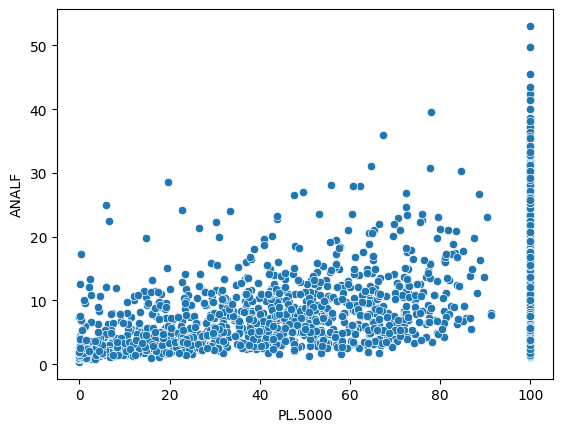

In [26]:
sns.scatterplot(x="PL.5000", y="ANALF", data=df)

# g.
¿Existe una relación? ¿Cómo podrías analizar con que variable tiene mñas corelación el porcentaje de analfabetismo en personas mayores de 15 años?

- Existe una ligera relación, ya que se observa que para valores altos de la variable PL.5000, hay valores más altos de analfabetismo, pero esto no sucede en todos los casos.
- Para anlizar con qué variables el porcentaje de analfabetismo tiene más correlacion, podemos utilizar el metodo `corr`

In [27]:
corr = df.select_dtypes(include=np.number).corr()["ANALF"]
print("Valor de correlación con variables")
print(corr.sort_values(ascending=False, key=lambda x: abs(x)))

Valor de correlación con variables
ANALF       1.000000
IMN_2020   -0.847822
IM_2020    -0.847822
SBASC       0.779053
VHAC        0.658532
OVPT        0.644960
PO2SM       0.620011
PL.5000     0.449324
OVSAE       0.360644
OVSEE       0.351523
OVSDE       0.347537
POB_TOT    -0.236801
CVE_MUN     0.013398
CVE_ENT     0.008475
Name: ANALF, dtype: float64


- Aquí se puede observar que tiene más relación con los índices de marginalización (IMN_2020, IM_2020) y con SBASC (porcentaje de población de 15 años o más sin educación básica)

Para ver la correlación entre todas las variables, podemos utilizar una matriz de correlación.

<Axes: >

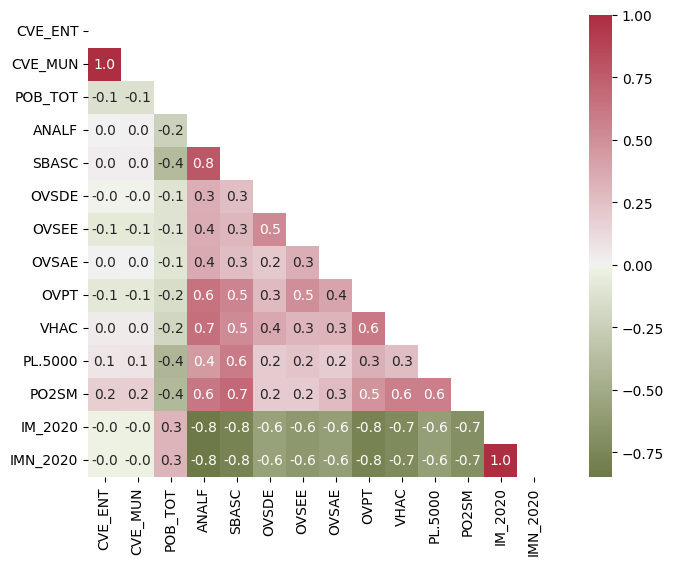

In [28]:
corr = df.select_dtypes(include=np.number).corr()

cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
                            
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.1f', square=True, cmap=cmap)

# h.
Desarrolla un nuevo DataFrame con indicadores interesantes por estado que se obtengan de los datos a nivel municipal y que pudieran ser de importancia a la hora de definir políticas públicas. Se va a calificar la originalidad de los indicadores. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.

- Vamos a juntar los porcentajes y cantidades de los municipios y sumarlos en cada estado (solo con algunas variables).

In [29]:
df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


In [30]:
df_estados = pd.DataFrame()
df_estados["ESTADO"] = df["NOM_ENT"].unique()

In [31]:
df_estados["POB_ANALF"] = df["POB_TOT"] * df["ANALF"] / 100
df_estados["POB_SBASC"] = df["POB_TOT"] * df["SBASC"] / 100
df_estados["POB_OVSDE"] = df["POB_TOT"] * df["OVSDE"] / 100
df_estados["POB_PL.5000"] = df["POB_TOT"] * df["PL.5000"] / 100

In [32]:
df_estados.head()

,ESTADO,POB_ANALF,POB_SBASC,POB_OVSDE,POB_PL.5000
0,Aguascalientes,15608.396996,193282.884911,994.529179,71399.0
1,Baja California,1817.368313,17473.983954,1365.896048,40312.0
2,Baja California Sur,2616.304033,24746.027031,212.715747,29883.0
3,Campeche,534.627448,4708.446731,121.185342,11130.0
4,Coahuila de Zaragoza,3093.073585,34681.268634,359.947456,48287.0


Agreguemos la población total como referencia

In [34]:
agrupado = df.groupby(["NOM_ENT"]).sum().reset_index()
agrupado.head()

,NOM_ENT,CVE_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,Aguascalientes,11,11066,AguascalientesAsientosCalvilloCosíoJesús María...,1425607,34.298538,330.693957,11.616799,5.832557,10.661999,11.814235,216.557273,545.667768,786.067698,635.560085,Muy bajoMuy bajoMuy bajoMuy bajoMuy bajoMuy ba...,9.951986
1,Baja California,12,12021,EnsenadaMexicaliTecateTijuanaPlayas de Rosarit...,3769020,17.477469,175.605313,1.830842,8.902803,31.462925,13.849242,101.868502,117.227262,436.500521,346.688048,Muy bajoMuy bajoMuy bajoMuy bajoMuy bajoMedio,5.428652
2,Baja California Sur,15,15023,ComondúMulegéLa PazLos CabosLoreto,798447,14.354751,135.784312,3.257337,5.924550,18.996165,20.435147,93.265329,81.875577,261.065235,293.164683,Muy bajoMuy bajoMuy bajoMuy bajoMuy bajo,4.590551
3,Campeche,48,48078,CalkiníCampecheCarmenChampotónHecelchakánHopel...,928363,98.291840,418.043465,52.877939,18.362000,75.212363,41.846180,413.815220,589.638351,959.847154,656.172567,BajoMuy bajoMuy bajoBajoBajoMedioMedioBajoBajo...,10.274749
4,Chiapas,868,875780,AcacoyaguaAcalaAcapetahuaAltamiranoAmatánAmate...,5543828,2033.913587,6701.033322,352.567166,218.160428,1303.492395,1679.346850,5102.556854,9331.828068,11290.278495,6327.284569,MedioMedioAltoAltoAltoAltoMuy altoAltoMedioAlt...,99.076471


In [35]:
df_estados["POB_TOT"] = agrupado["POB_TOT"]

In [36]:
df_estados.head()

,ESTADO,POB_ANALF,POB_SBASC,POB_OVSDE,POB_PL.5000,POB_TOT
0,Aguascalientes,15608.396996,193282.884911,994.529179,71399.0,1425607
1,Baja California,1817.368313,17473.983954,1365.896048,40312.0,3769020
2,Baja California Sur,2616.304033,24746.027031,212.715747,29883.0,798447
3,Campeche,534.627448,4708.446731,121.185342,11130.0,928363
4,Coahuila de Zaragoza,3093.073585,34681.268634,359.947456,48287.0,5543828


Podríamos seguir haciendo esto con más variables, así tendríamos una referencia básica de las métricas por estado.

- Exportemos este dataframe en modo parquet

In [37]:
df_estados.to_parquet("info_estados.parquet")